# Persiapan dan Analisis Data

### Import Data

In [44]:
import numpy as np
import pandas as pd

In [45]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1KhHuJrSxyE_tnXKCR2QXqwvdGsCC-ur2/export?format=csv')

In [46]:
df.head()

,meanR,meanG,meanB,stdR,stdG,stdB,skewR,skewG,skewB,kurR,kurG,kurB,entR,entG,entB,Class
0,17.395776,18.057278,4.548844,40.818315,42.747400,15.235375,2.080558,2.117612,4.194824,2.786645,2.922868,18.932746,11.312396,11.302187,10.864530,1
1,17.048930,17.143965,4.285857,41.389466,42.116279,14.243516,2.185737,2.233318,4.195780,3.243245,3.436646,19.700106,11.256998,11.242310,10.867538,1
2,19.957301,16.498584,5.082156,48.724795,40.816921,15.203335,2.169338,2.245723,3.863509,3.069086,3.474671,17.313374,11.242156,11.228013,11.041794,1
3,19.713066,18.029258,4.707696,47.484912,43.629222,14.230307,2.135099,2.147982,3.987222,2.920590,2.926331,18.956953,11.266421,11.260806,11.034323,1
4,17.383914,14.581238,4.632718,46.006665,38.900382,14.446719,2.417031,2.458251,3.903999,4.259136,4.460186,17.438845,11.103429,11.094264,10.944285,1


In [47]:
df.drop(['Class'],axis=1,inplace=True)

In [48]:
df.shape[0]

5656

In [49]:
# df = df.head(100)

In [50]:
print("test")

test


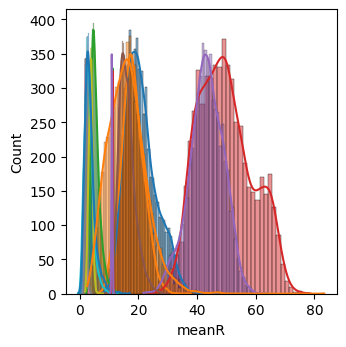

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

for i, feature in enumerate(df, 1):
    plt.subplot(3, 5, 1)  # 3 baris dan 5 kolom
    sns.histplot(df[feature], kde=True)

plt.tight_layout()
plt.show()

### Informasi Statistik Dasar

In [52]:
statistika_deskriptif = pd.DataFrame({
    'Mean': df.mean(),
    'Standard Deviation': df.std(),
    'Minimum': df.min(),
    'Maximum': df.max(),
    'Range': df.max() - df.min(),
    'Q1': df.quantile(0.25),
    'Median': df.quantile(0.5),
    'Q3': df.quantile(0.75),
})

display(statistika_deskriptif)

,Mean,Standard Deviation,Minimum,Maximum,Range,Q1,Median,Q3
meanR,20.894382,5.260718,6.854176,46.994451,40.140274,17.015386,20.055104,23.933250
meanG,18.023509,3.885058,6.259336,37.866338,31.607002,15.462487,17.823574,20.508286
meanB,5.562521,1.572465,1.823841,14.023399,12.199558,4.469088,5.206807,6.298417
stdR,49.518673,9.091646,23.889681,78.573397,54.683716,42.518804,48.737837,55.533851
stdG,43.181128,5.799811,21.816707,63.912439,42.095732,39.565446,43.274979,47.258675
stdB,16.216090,2.737406,7.831019,29.260652,21.429632,14.261454,15.830328,17.684630
skewR,2.164332,0.298941,1.154889,3.582313,2.427425,1.962475,2.147151,2.337118
skewG,2.232326,0.340901,1.203163,3.997579,2.794416,2.003130,2.188874,2.405244
skewB,3.745612,0.647198,1.944842,7.961952,6.017110,3.304125,3.764237,4.170742
kurR,3.208423,1.533598,-0.531692,12.941081,13.472773,2.161075,3.023438,3.989808


### Missing Value

In [53]:
df.isna().sum()

meanR    0
meanG    0
meanB    0
stdR     0
stdG     0
stdB     0
skewR    0
skewG    0
skewB    0
kurR     0
kurG     0
kurB     0
entR     0
entG     0
entB     0
dtype: int64

### Distribusi Data

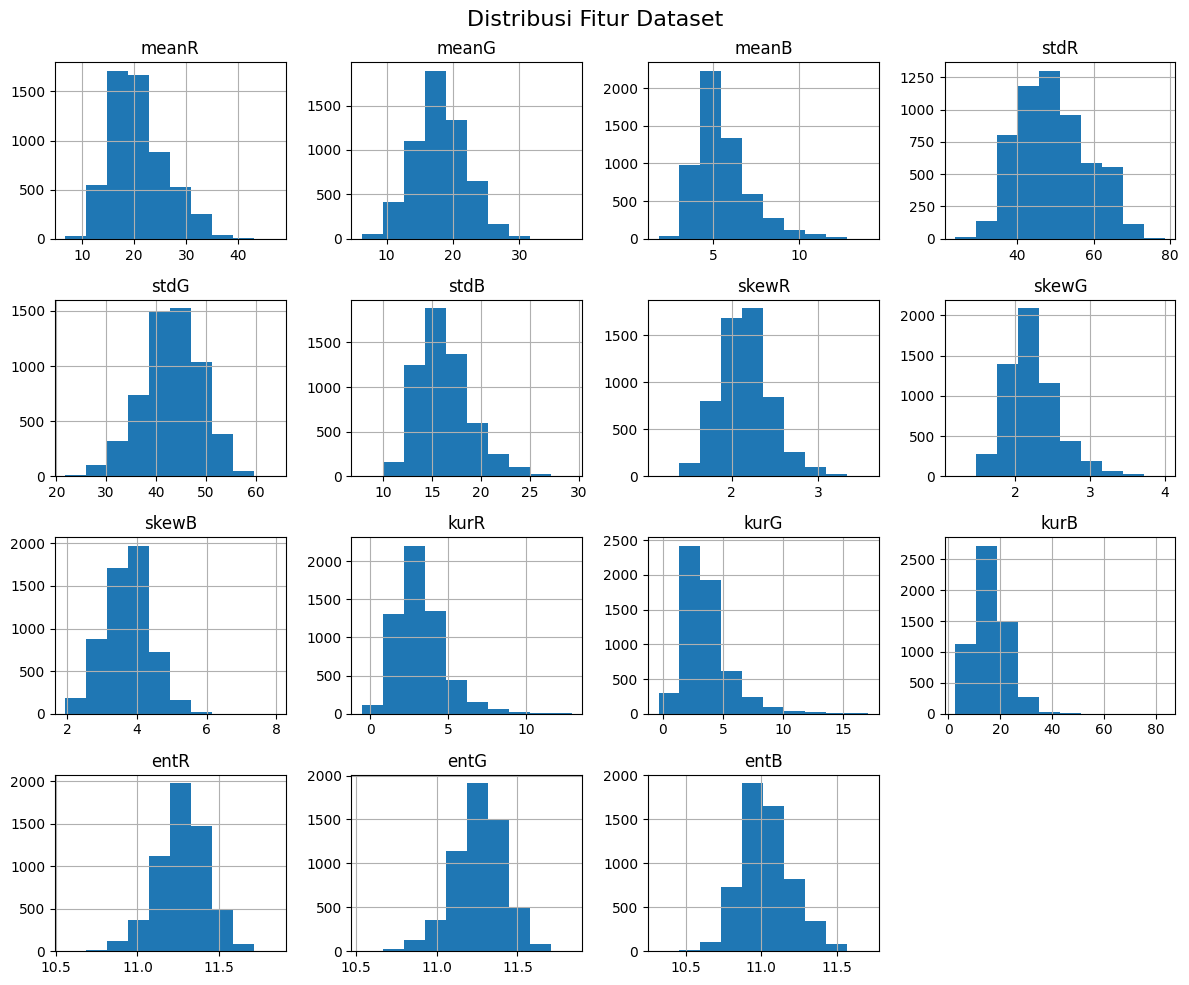

In [54]:
# import matplotlib.pyplot as plt
# import seaborn as sns

df.hist(figsize=(12, 10))  # Adjust figure size as needed
plt.suptitle('Distribusi Fitur Dataset', fontsize=16)
plt.tight_layout()
plt.show()

### Mengidentifikasi Outlier

In [55]:
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# To find outliers for all columns:
for column in df.columns:
    outliers = find_outliers_iqr(df, column)
    outliers_sum = outliers.shape[0]
    if outliers.shape[0] > 0:  # Check if there are any outliers
        print(f"Outliers in {column}: {outliers_sum}")

Outliers in meanR: 65
Outliers in meanG: 50
Outliers in meanB: 211
Outliers in stdR: 3
Outliers in stdG: 41
Outliers in stdB: 143
Outliers in skewR: 109
Outliers in skewG: 170
Outliers in skewB: 34
Outliers in kurR: 170
Outliers in kurG: 288
Outliers in kurB: 87
Outliers in entR: 99
Outliers in entG: 87
Outliers in entB: 74


In [56]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame

def find_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    outliers = df[z_scores > threshold]
    return outliers

# To find the number of outliers for all columns:
for column in df.columns:
    outliers = find_outliers_zscore(df, column)
    outliers_sum = outliers.shape[0]  # Get the number of outliers
    if outliers_sum > 0:
        print(f"Outliers in {column}: {outliers_sum}")

Outliers in meanR: 17
Outliers in meanG: 16
Outliers in meanB: 94
Outliers in stdR: 1
Outliers in stdG: 13
Outliers in stdB: 54
Outliers in skewR: 45
Outliers in skewG: 63
Outliers in skewB: 20
Outliers in kurR: 72
Outliers in kurG: 97
Outliers in kurB: 40
Outliers in entR: 27
Outliers in entG: 27
Outliers in entB: 23


# Preprocessing Data

### Imputasi Outlier dengan Nilai Mean

In [57]:
# th = 3
# for column in df.columns:
#     z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
#     mean = df[column].mean()

#     df[column] = np.where(z_scores > th, mean, df[column])

In [58]:
# df.hist(figsize=(12, 10))  # Adjust figure size as needed
# plt.suptitle('Distribusi Fitur Dataset Setelah Imputasi', fontsize=16)
# plt.tight_layout()
# plt.show()

### Standarisasi Z-Score

In [59]:
from sklearn.preprocessing import StandardScaler

zscore = StandardScaler()
df_zscore = zscore.fit_transform(df)
df = pd.DataFrame(df_zscore, columns=df.columns)

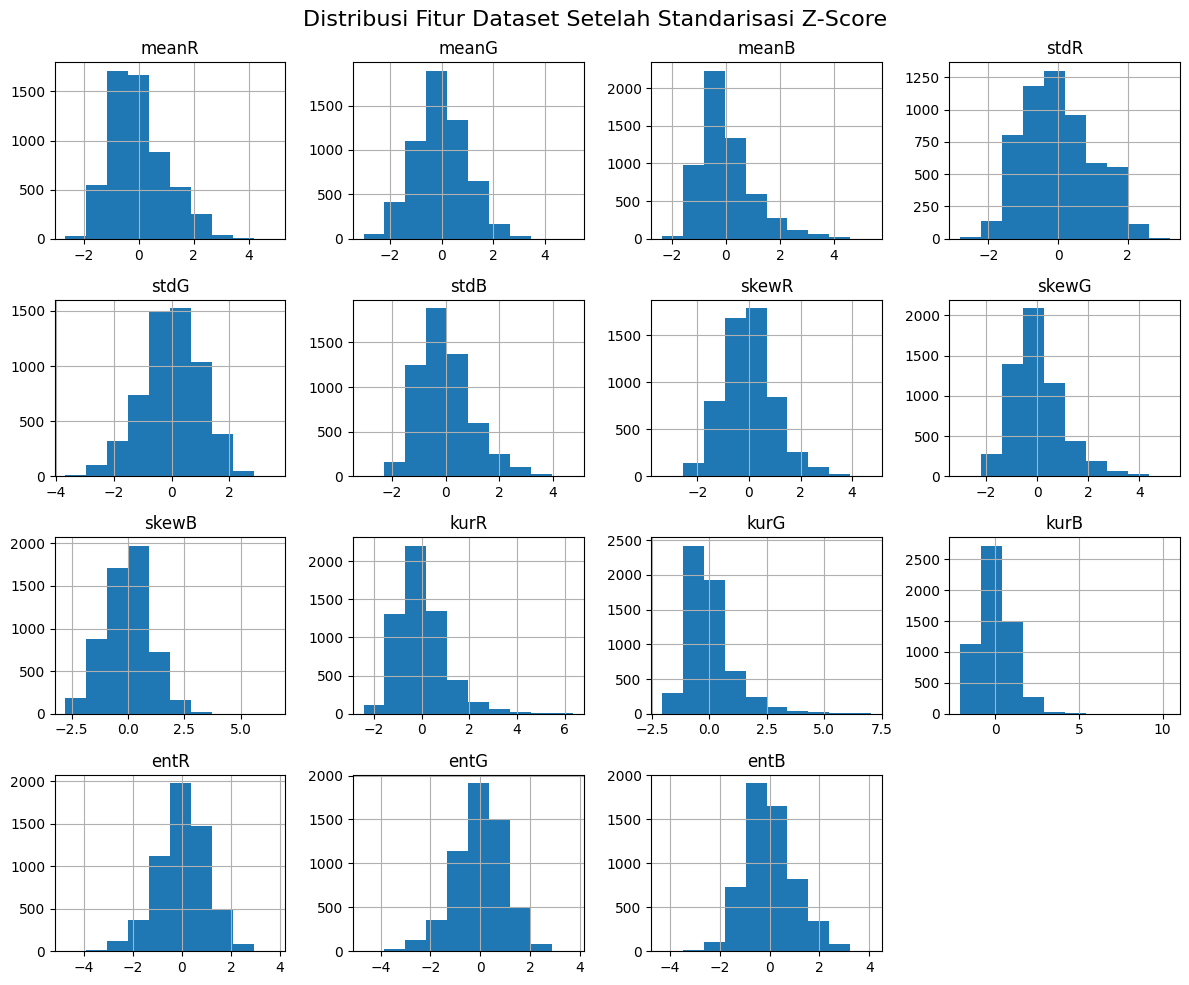

In [60]:
df.hist(figsize=(12, 10))  # Adjust figure size as needed
plt.suptitle('Distribusi Fitur Dataset Setelah Standarisasi Z-Score', fontsize=16)
plt.tight_layout()
plt.show()

### PCA

In [61]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
X_pca = pca.fit_transform(df)

num_components = 2

pca_reduced = PCA(n_components=num_components)
X_reduced = pca_reduced.fit_transform(df)

columns = [f'PC{i+1}' for i in range(num_components)]
df = pd.DataFrame(X_reduced, columns=columns)

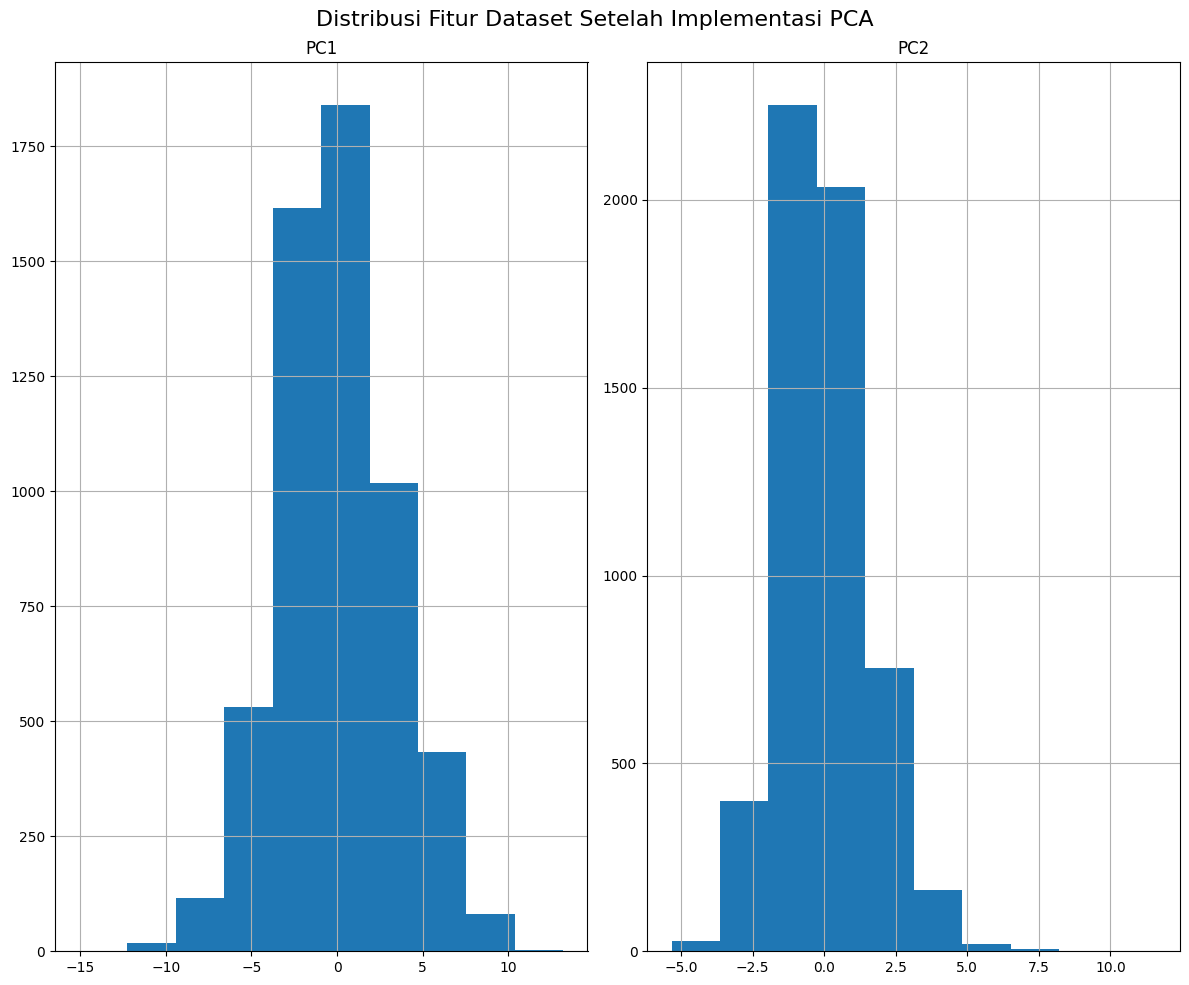

In [62]:
df.hist(figsize=(12, 10))  # Adjust figure size as needed
plt.suptitle('Distribusi Fitur Dataset Setelah Implementasi PCA', fontsize=16)
plt.tight_layout()
plt.show()

In [63]:
df.head()

,PC1,PC2
0,-0.738357,1.602585
1,-1.514797,1.284781
2,-0.600808,0.217052
3,-0.350192,1.006064
4,-2.549994,-0.572403


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656 entries, 0 to 5655
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     5656 non-null   float64
 1   PC2     5656 non-null   float64
dtypes: float64(2)
memory usage: 88.5 KB


### Normalisasi MinMax

In [65]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns=df.columns)

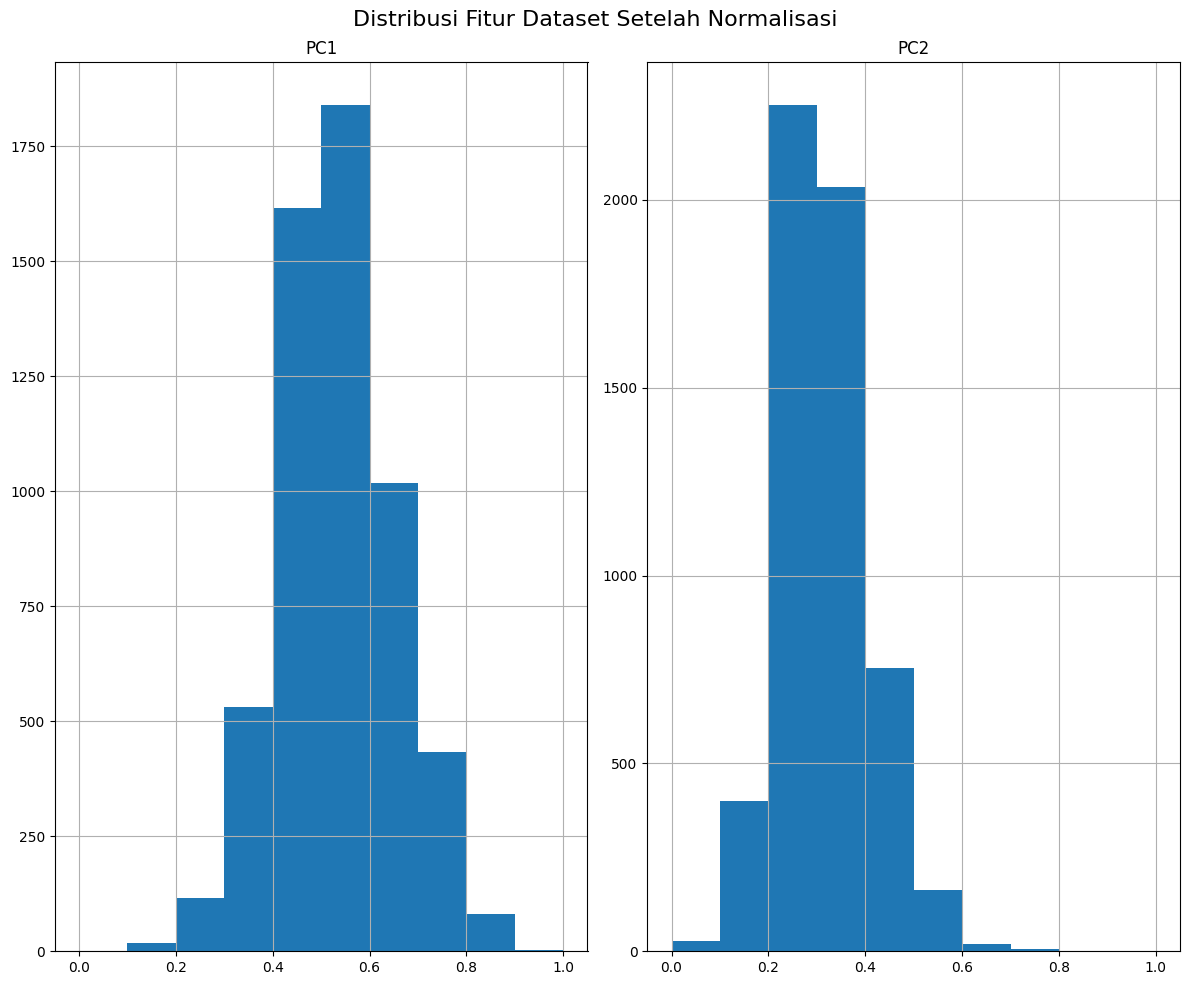

In [66]:
df.hist(figsize=(12, 10))
plt.suptitle('Distribusi Fitur Dataset Setelah Normalisasi', fontsize=16)
plt.tight_layout()
plt.show()

# Model

In [67]:
def SOM(train, w, cluster, R, max_epoch, lr, R_change):
  d = []
  closest_neighbors = []
  w_out = []

  for i in range(max_epoch):
    for j in range(len(train)):
      data = train[j]
      d_in = []
      w_to_update = []

      for k in range(len(w)):
         d_in.append(np.linalg.norm(data - w[k]))

      d_out_indices = np.argsort(d_in)
      if i == max_epoch-1:
        closest_neighbor_index = d_out_indices[0]
        closest_neighbors.append(closest_neighbor_index)
      
      d.append(np.copy(d_in[d_out_indices[0]]))
      
      w_to_update = d_out_indices[:R + 1]

      for l in w_to_update :
        dw = (np.multiply(lr,(np.subtract(data, w[l]))))
        w[l] = np.add(w[l], dw)
      w_out.append(np.copy(w))
    lr *= 0.5
    if((i+1)%R_change == 0):
      R = np.random.randint(0,cluster)

  return d, w, closest_neighbors, w_out

# Calculating Error

In [ ]:
from sklearn.metrics import silhouette_score

def silhouette_score_som(train, w, closest_neighbors):
    labels = closest_neighbors   
    if len(np.unique(labels)) < 2:
        return -1
    score = silhouette_score(train, labels, metric='euclidean')
    return score

def quantization_error(train, w, closest_neighbors):
  total_error = 0
  for i, data in enumerate(train):
    bmu = w[closest_neighbors[i]]
    total_error += np.linalg.norm(data - bmu)
  return total_error / len(train)

def topographic_error(train, w, closest_neighbors):
  error_count = 0
  for i, data in enumerate(train):
    distances = [np.linalg.norm(data - weight) for weight in w]

    sorted_indices = np.argsort(distances)
    closest_neighbors = sorted_indices[0]
    second_closest_neighbors = sorted_indices[1]

    if abs(closest_neighbors - second_closest_neighbors) > 1:
      error_count += 1

  return error_count / len(train)


def count_error(train, w, closest_neighbors):
  qe = quantization_error(train, w, closest_neighbors)
  te = topographic_error(train, w, closest_neighbors)
  ss = silhouette_score_som(train, w, closest_neighbors)
  return qe, te, ss

# Tuning Hyperparameter

## Tuning Manual

In [75]:
size = df.shape[1]
te_qe_ss_manual_plot = []

def generate_random_parameters(size):
  cluster = np.random.randint(2, 10)
  w = np.random.rand(cluster, size)
  R = np.random.randint(0, cluster)
  lr = np.random.uniform(1e-10, 0.1)
  R_change = np.random.randint(1, 10)
  max_epoch = np.random.randint(10, 100)

  return cluster, w, R, lr, R_change, max_epoch

def tuning(iter):
  used_parameters = set()
  best_parameter = []
  best_error = [1e1000,0,0,0]

  for i in range(iter):
    while True:
      cluster, w, R, lr, R_change, max_epoch = generate_random_parameters(size)

      param_tuple = (cluster, w.tobytes(), R, lr, R_change, max_epoch)

      if param_tuple not in used_parameters:
        used_parameters.add(param_tuple)
        break

    tuning_data = df.to_numpy()
    print(f'Tuning {i}, cluster : {cluster}, R : {R}, lr : {lr}, R change : {R_change}, max epoch : {max_epoch}')
    d, w, closest_neighbors, w_out = SOM(tuning_data, w, cluster=cluster, R=R, lr = lr, max_epoch=max_epoch, R_change=R_change)

    qe, te, ss = count_error(tuning_data, w, closest_neighbors)
    print(f'qe : {qe}, te : {te}, ss : {ss}')

    if qe+te-ss < best_error[0]:
      best_error[0] = qe+te
      best_error[1] = qe
      best_error[2] = te
      best_error[3] = ss
      best_parameter = [i, cluster, w, R, lr, R_change, max_epoch]
      
    te_qe_ss_manual_plot.append((te,qe,ss))
    
    print(f'best parameter is tuning {best_parameter[0]}, with error qe : {best_error[1]}, te : {best_error[2]}, and ss : {best_error[3]}\n')
  return best_parameter

best_parameter_manual = tuning(10)

Tuning 0, cluster : 4, R : 3, lr : 0.08786116657297781, R change : 3, max epoch : 54
qe : 0.09055372333152509, te : 0.3175388967468175, ss : 0.14764975740074304
best parameter is tuning 0, with error qe : 0.09055372333152509, te : 0.3175388967468175, and ss : 0.14764975740074304

Tuning 1, cluster : 8, R : 3, lr : 0.013037182546184082, R change : 8, max epoch : 64
qe : 0.0856859801424522, te : 0.9890381895332391, ss : 0.13761197974076828
best parameter is tuning 0, with error qe : 0.09055372333152509, te : 0.3175388967468175, and ss : 0.14764975740074304

Tuning 2, cluster : 2, R : 1, lr : 0.09592323765026656, R change : 2, max epoch : 80
qe : 0.107221578315099, te : 0.0, ss : 0.34876938458769086
best parameter is tuning 2, with error qe : 0.107221578315099, te : 0.0, and ss : 0.34876938458769086

Tuning 3, cluster : 6, R : 4, lr : 0.059907278935636785, R change : 3, max epoch : 88
qe : 0.07174635050023256, te : 0.5236916548797736, ss : 0.24642368171545823
best parameter is tuning 2, w

## Tuning dengan OPTUNA

In [76]:
import optuna

size = df.shape[1]
te_qe_ss_optuna_plot = []

def tuning(trial):
    
    cluster = trial.suggest_int("cluster", 2, 10)
    R = trial.suggest_int("R", 0, cluster - 1)
    lr = trial.suggest_float("lr", 1e-10, 0.1, log=True)
    R_change = trial.suggest_int("R_change", 1, 10)
    max_epoch = trial.suggest_int("max_epoch", 10, 100)
    w = np.array([[trial.suggest_float(f"w{i}{j}", 0.0, 1.0) for j in range(size)]for i in range(cluster)])

    tuning_data = df.to_numpy()
    print(f'Trial {trial.number}, cluster : {cluster}, R : {R}, lr : {lr}, R change : {R_change}, max epoch : {max_epoch}')
    
    d, w, closest_neighbors, w_out = SOM(tuning_data, w, cluster=cluster, R=R, lr=lr, max_epoch=max_epoch, R_change=R_change)

    qe, te, ss = count_error(tuning_data, w, closest_neighbors)
    print(f'qe : {qe}, te : {te}, ss : {ss}')

    total_error = qe + te
    te_qe_ss_optuna_plot.append((te, qe, ss))
    return total_error - ss

study = optuna.create_study(direction="minimize") 
study.optimize(tuning, n_trials=10)

[I 2024-11-20 20:02:59,894] A new study created in memory with name: no-name-5927ad0b-8ca9-4326-8a23-aa0623c99471


Trial 0, cluster : 4, R : 3, lr : 5.022388255026203e-10, R change : 5, max epoch : 88


[I 2024-11-20 20:03:08,606] Trial 0 finished with value: 0.2443989270088337 and parameters: {'cluster': 4, 'R': 3, 'lr': 5.022388255026203e-10, 'R_change': 5, 'max_epoch': 88, 'w00': 0.11326007702381058, 'w01': 0.6946965975173837, 'w10': 0.4074324529259896, 'w11': 0.9920393116827853, 'w20': 0.26362746442038865, 'w21': 0.5267825901475854, 'w30': 0.48779953594711256, 'w31': 0.8345030587059977}. Best is trial 0 with value: 0.2443989270088337.


qe : 0.3589076152665945, te : 0.27015558698727016, ss : 0.384664275245031
Trial 1, cluster : 9, R : 0, lr : 0.07209488844785622, R change : 4, max epoch : 42


[I 2024-11-20 20:03:16,145] Trial 1 finished with value: 0.6572585247120998 and parameters: {'cluster': 9, 'R': 0, 'lr': 0.07209488844785622, 'R_change': 4, 'max_epoch': 42, 'w00': 0.6458826997818629, 'w01': 0.5334181389723964, 'w10': 0.348285934039511, 'w11': 0.3459223907000305, 'w20': 0.35753081655217334, 'w21': 0.519850283688252, 'w30': 0.9348194936721137, 'w31': 0.3664444836934274, 'w40': 0.4293283051057565, 'w41': 0.44849539798195115, 'w50': 0.9968710117979092, 'w51': 0.8230100450991039, 'w60': 0.9920386080580125, 'w61': 0.05720635077086311, 'w70': 0.17504107319499784, 'w71': 0.33531654316974335, 'w80': 0.04037081824060473, 'w81': 0.32245780601788454}. Best is trial 0 with value: 0.2443989270088337.


qe : 0.08745846768653662, te : 0.5553394625176803, ss : -0.014460594507882854
Trial 2, cluster : 2, R : 0, lr : 1.943145576362499e-08, R change : 4, max epoch : 94


[I 2024-11-20 20:03:22,528] Trial 2 finished with value: 0.08316121125181897 and parameters: {'cluster': 2, 'R': 0, 'lr': 1.943145576362499e-08, 'R_change': 4, 'max_epoch': 94, 'w00': 0.17746117475138978, 'w01': 0.11830963564352281, 'w10': 0.1548881852455587, 'w11': 0.8378449708025814}. Best is trial 2 with value: 0.08316121125181897.


qe : 0.4141099802236008, te : 0.0, ss : 0.3309487689717818
Trial 3, cluster : 2, R : 0, lr : 2.9812151598786924e-09, R change : 4, max epoch : 51


[I 2024-11-20 20:03:26,181] Trial 3 finished with value: 0.08759002792319848 and parameters: {'cluster': 2, 'R': 0, 'lr': 2.9812151598786924e-09, 'R_change': 4, 'max_epoch': 51, 'w00': 0.32417191076947216, 'w01': 0.7339039024138819, 'w10': 0.8038794390014339, 'w11': 0.05647267327539218}. Best is trial 2 with value: 0.08316121125181897.


qe : 0.35168649184778783, te : 0.0, ss : 0.26409646392458935
Trial 4, cluster : 7, R : 3, lr : 1.8676557743431676e-10, R change : 7, max epoch : 73


[I 2024-11-20 20:03:37,830] Trial 4 finished with value: 0.4863643223864008 and parameters: {'cluster': 7, 'R': 3, 'lr': 1.8676557743431676e-10, 'R_change': 7, 'max_epoch': 73, 'w00': 0.09906421719915814, 'w01': 0.005375433433650434, 'w10': 0.4061249011534708, 'w11': 0.053824154192129936, 'w20': 0.6169176494284694, 'w21': 0.42393995140790874, 'w30': 0.039762580025422545, 'w31': 0.8996924695653135, 'w40': 0.5290335770660026, 'w41': 0.579198800177993, 'w50': 0.7675005509716328, 'w51': 0.6523685672009795, 'w60': 0.00984282632449085, 'w61': 0.4570920459272445}. Best is trial 2 with value: 0.08316121125181897.


qe : 0.1568137954961566, te : 0.5510961810466761, ss : 0.22154565415643188
Trial 5, cluster : 8, R : 2, lr : 2.6349806772975556e-10, R change : 5, max epoch : 93


[I 2024-11-20 20:04:45,589] Trial 5 finished with value: 0.6294508707786137 and parameters: {'cluster': 8, 'R': 2, 'lr': 2.6349806772975556e-10, 'R_change': 5, 'max_epoch': 93, 'w00': 0.0021780325919216192, 'w01': 0.04231857633685643, 'w10': 0.1565480670012901, 'w11': 0.575933705114497, 'w20': 0.3489771315928738, 'w21': 0.5715901793907708, 'w30': 0.1106358628851718, 'w31': 0.2679209813777672, 'w40': 0.008254615410547617, 'w41': 0.6971886199802346, 'w50': 0.8841277402474702, 'w51': 0.19912008164484452, 'w60': 0.19690800513538043, 'w61': 0.1629862059966959, 'w70': 0.5005058601455153, 'w71': 0.05585057001226712}. Best is trial 2 with value: 0.08316121125181897.


qe : 0.21774785291916937, te : 0.7167609618104668, ss : 0.30505794395102237
Trial 6, cluster : 9, R : 7, lr : 2.1023108968985185e-06, R change : 8, max epoch : 62


[I 2024-11-20 20:05:07,815] Trial 6 finished with value: 0.6550865117454439 and parameters: {'cluster': 9, 'R': 7, 'lr': 2.1023108968985185e-06, 'R_change': 8, 'max_epoch': 62, 'w00': 0.04316555335403638, 'w01': 0.6840938572581817, 'w10': 0.5432469135023876, 'w11': 0.8766914435616128, 'w20': 0.054291208704975724, 'w21': 0.7223849115639125, 'w30': 0.09137597993374613, 'w31': 0.5222509834013979, 'w40': 0.5925593378088936, 'w41': 0.4995255585445981, 'w50': 0.7655020336015659, 'w51': 0.6769301554150422, 'w60': 0.9437242130194984, 'w61': 0.03332515609273634, 'w70': 0.9225917266129384, 'w71': 0.531630997860173, 'w80': 0.7784660409039083, 'w81': 0.6513078409528134}. Best is trial 2 with value: 0.08316121125181897.


qe : 0.21563501869218232, te : 0.6499292786421499, ss : 0.21047778558888844
Trial 7, cluster : 9, R : 7, lr : 2.7743551191158294e-10, R change : 1, max epoch : 51


[I 2024-11-20 20:05:23,216] Trial 7 finished with value: 0.5559314095953736 and parameters: {'cluster': 9, 'R': 7, 'lr': 2.7743551191158294e-10, 'R_change': 1, 'max_epoch': 51, 'w00': 0.292184019630667, 'w01': 0.9891000311859236, 'w10': 0.17441093273816533, 'w11': 0.01727430094626936, 'w20': 0.8578894586233371, 'w21': 0.2140620789287202, 'w30': 0.5729455905834098, 'w31': 0.5739019224540598, 'w40': 0.5723195988268099, 'w41': 0.283755841978647, 'w50': 0.4648917433853935, 'w51': 0.9463050424044372, 'w60': 0.20833326802087304, 'w61': 0.3980204003309281, 'w70': 0.3288926824060847, 'w71': 0.2435220052109176, 'w80': 0.6712085815578198, 'w81': 0.7608378999535592}. Best is trial 2 with value: 0.08316121125181897.


qe : 0.09726865388037363, te : 0.699964639321075, ss : 0.24130188360607513
Trial 8, cluster : 10, R : 3, lr : 5.519364528320382e-06, R change : 8, max epoch : 73


[I 2024-11-20 20:06:01,330] Trial 8 finished with value: 1.001451052840682 and parameters: {'cluster': 10, 'R': 3, 'lr': 5.519364528320382e-06, 'R_change': 8, 'max_epoch': 73, 'w00': 0.43023216713832024, 'w01': 0.7612022868210016, 'w10': 0.47521325053602603, 'w11': 0.4531215329936876, 'w20': 0.18593793981530737, 'w21': 0.47662319660814056, 'w30': 0.841513867307497, 'w31': 0.4932316166154662, 'w40': 0.04084240975258424, 'w41': 0.33235536416054057, 'w50': 0.7277912464025834, 'w51': 0.8860225265593059, 'w60': 0.9371989579780274, 'w61': 0.19639971980805793, 'w70': 0.3840143939525278, 'w71': 0.0347687489358427, 'w80': 0.17752053079279828, 'w81': 0.8384459261716083, 'w90': 0.2514764873912908, 'w91': 0.5142168883712914}. Best is trial 2 with value: 0.08316121125181897.


qe : 0.15454416621901967, te : 0.9826732673267327, ss : 0.13576638070507038
Trial 9, cluster : 5, R : 1, lr : 1.573604711437101e-10, R change : 6, max epoch : 59


[I 2024-11-20 20:06:11,783] Trial 9 finished with value: 0.3145430600581045 and parameters: {'cluster': 5, 'R': 1, 'lr': 1.573604711437101e-10, 'R_change': 6, 'max_epoch': 59, 'w00': 0.10874285921008009, 'w01': 0.8201996437396853, 'w10': 0.49785104151426585, 'w11': 0.690855728644337, 'w20': 0.3174816260966591, 'w21': 0.3798092602744403, 'w30': 0.17805824936893466, 'w31': 0.1744307891261233, 'w40': 0.8860938722806451, 'w41': 0.39946991607894355}. Best is trial 2 with value: 0.08316121125181897.


qe : 0.20681850969377852, te : 0.4107142857142857, ss : 0.30298973534995977


# Testing dengan Best Hyperparameter

## Testing dengan Hyperparameter Manual

In [78]:
train = df.to_numpy()

d_manual, w_manual, closest_neighbors_manual, w_output_manual = SOM(train, w=best_parameter_manual[2], cluster=best_parameter_manual[1], R=best_parameter_manual[3], lr = best_parameter_manual[4], R_change = best_parameter_manual[5], max_epoch=best_parameter_manual[6])
qe, te, ss = count_error(train, w_manual, closest_neighbors_manual)
print(f'qe : {qe}, te : {te}, ss : {ss}')

qe : 0.09983934400776277, te : 0.0, ss : 0.35134641141547857


## Testing dengan Hyperparameter Optuna

In [79]:
train = df.to_numpy()
best_parameter_optuna = [0]*6
w_temp = []
w_cluster = []
w = []

for i, value in enumerate(study.best_params.items()):
    if i < 5:
        best_parameter_optuna[i] = value[1]
    else:
        w_temp.append(value[1])
        
for i in range(len(w_temp)):
    w_cluster.append(w_temp[i])
    if (i+1)%(len(w_temp)/best_parameter_optuna[0])==0:
        w.append(w_cluster)
        w_cluster = []

w = np.array(w)
best_parameter_optuna[5] = w

d_optuna, w_optuna, closest_neighbors_optuna, w_output_optuna = SOM(train, w=best_parameter_optuna[5], cluster=best_parameter_optuna[0], R=best_parameter_optuna[1], lr = best_parameter_optuna[2], R_change = best_parameter_optuna[3], max_epoch=best_parameter_optuna[4])
qe, te, ss = count_error(train, w_optuna, closest_neighbors_optuna)
print(f'qe : {qe}, te : {te}, ss : {ss}')

qe : 0.4141094459450121, te : 0.0, ss : 0.3309487689717818


# Analysis

## Data Heatmap

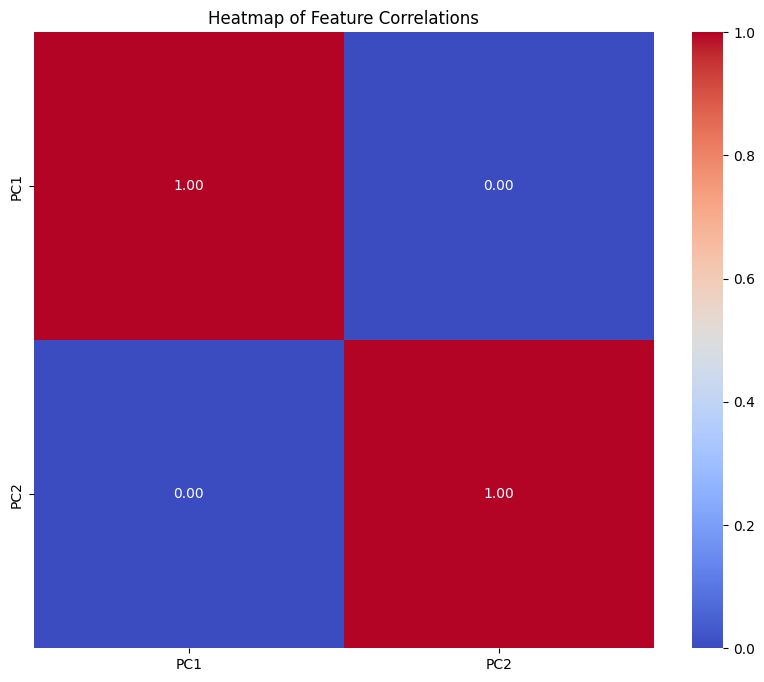

In [80]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap of Feature Correlations")
plt.show()

## Hyperparameter Manual

### Error Plot

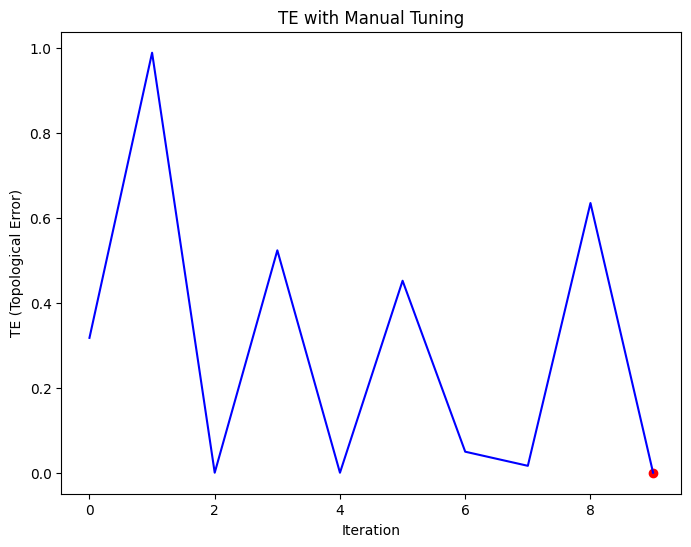

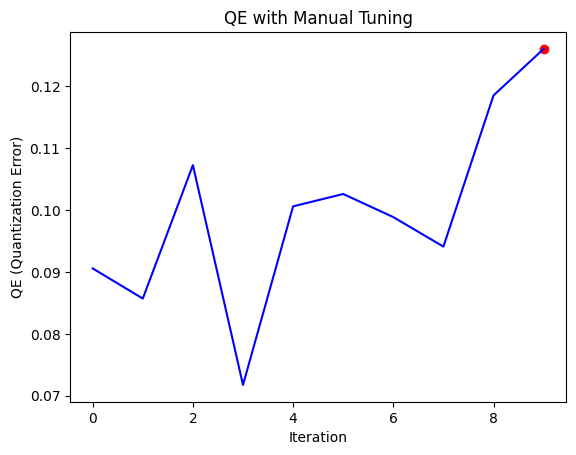

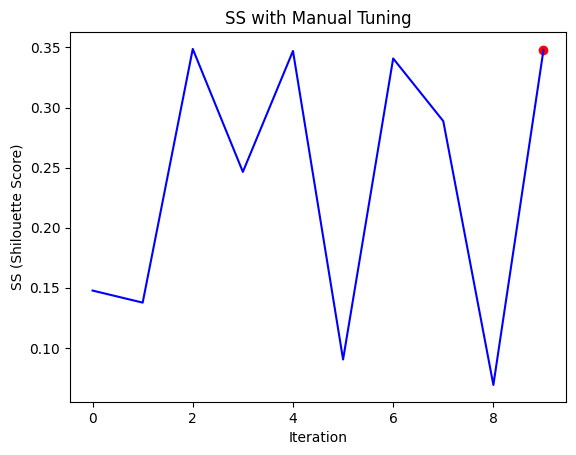

In [96]:
te_values, qe_values, ss_values = zip(*te_qe_ss_manual_plot)
plt.figure(figsize=(8, 6))
plt.plot(te_values, c="blue", label="TE-QE points")
plt.scatter(best_parameter_manual[0],te_values[best_parameter_manual[0]], color="red")
plt.xlabel("Iteration")
plt.ylabel("TE (Topological Error)")
plt.title("TE with Manual Tuning")
plt.show()

plt.plot(qe_values, c="blue", label="TE-QE points")
plt.scatter(best_parameter_manual[0],qe_values[best_parameter_manual[0]], color="red")
plt.xlabel("Iteration")
plt.ylabel("QE (Quantization Error)")
plt.title("QE with Manual Tuning")
plt.show()

plt.plot(ss_values, c="blue", label="SS points")
plt.scatter(best_parameter_manual[0],ss_values[best_parameter_manual[0]], color="red")
plt.xlabel("Iteration")
plt.ylabel("SS (Shilouette Score)")
plt.title("SS with Manual Tuning")
plt.show()

### Weight Plot

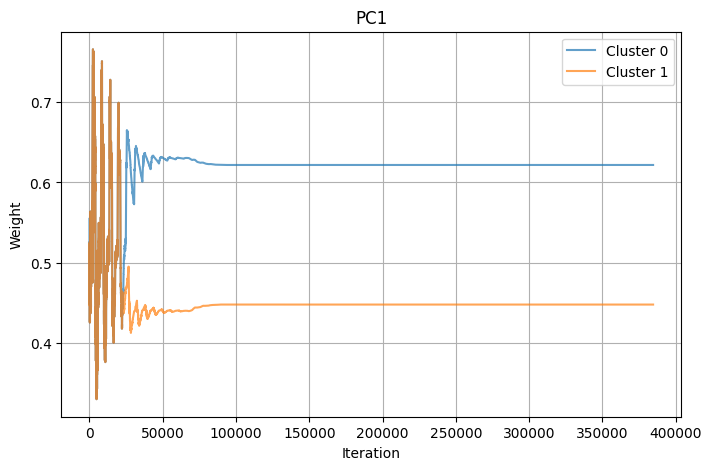

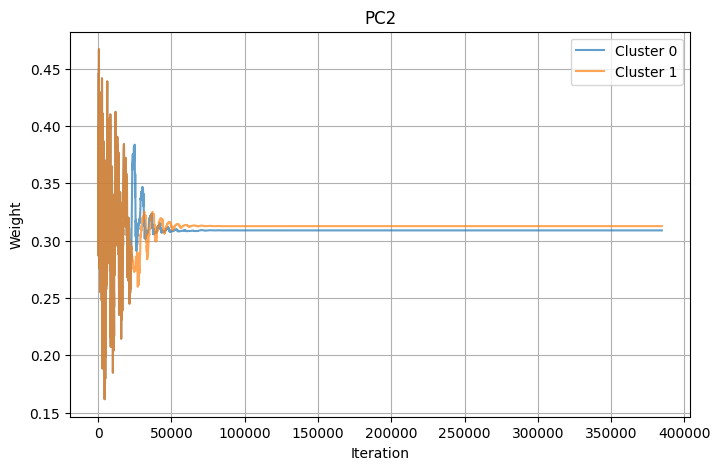

In [82]:
feature = df.columns.tolist()
w_output = np.array(w_output_manual)

n_features = w_output.shape[-1]
for col in range(n_features):
    plt.figure(figsize=(8, 5))
    for cluster in range(w_output.shape[1]):
        plt.plot(range(w_output.shape[0]), w_output[:, cluster, col], label=f"Cluster {cluster}", alpha=0.7)
    # Use feature[col] for the title
    plt.title(f"{feature[col]}")
    plt.xlabel("Iteration")
    plt.ylabel("Weight")
    plt.legend()
    plt.grid()
    plt.show()

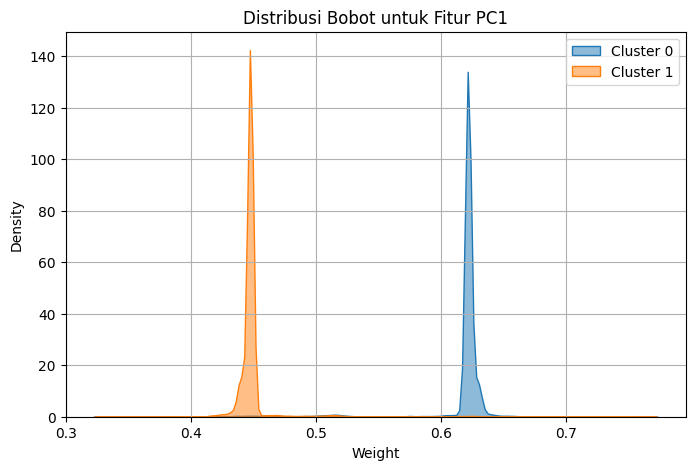

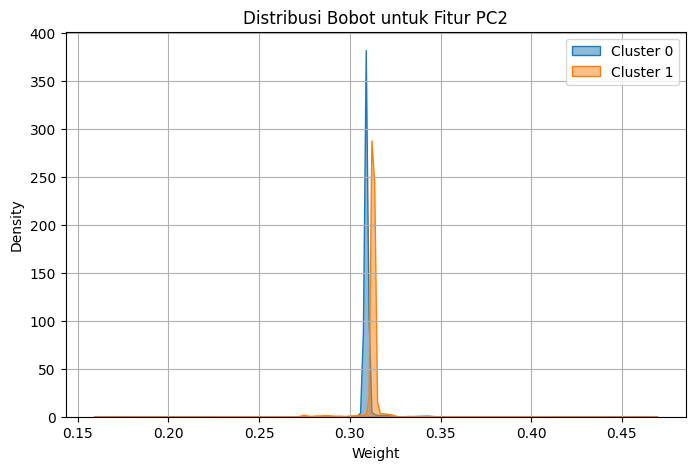

In [83]:
import matplotlib.pyplot as plt

features = df.columns.tolist()

n_features = w_output.shape[-1]

for col in range(n_features):
    plt.figure(figsize=(8, 5))
    for cluster in range(w_output.shape[1]):
        weights = w_output[:, cluster, col]
        sns.kdeplot(weights, label=f"Cluster {cluster}", fill=True, alpha=0.5)

    plt.title(f"Distribusi Bobot untuk Fitur {features[col]}")
    plt.xlabel("Weight")
    plt.ylabel("Density")
    plt.legend()
    plt.grid()
    plt.show()


C:\Users\hadik\AppData\Local\Temp\ipykernel_26012\3753402374.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[f"Cluster {cluster}" for cluster in range(w_output.shape[1])])


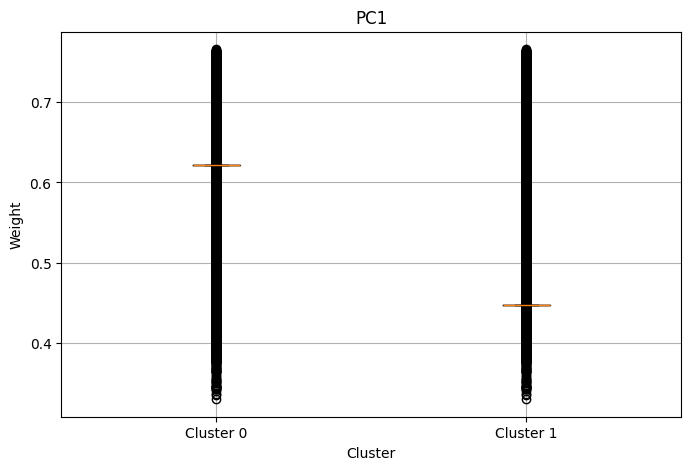

C:\Users\hadik\AppData\Local\Temp\ipykernel_26012\3753402374.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[f"Cluster {cluster}" for cluster in range(w_output.shape[1])])


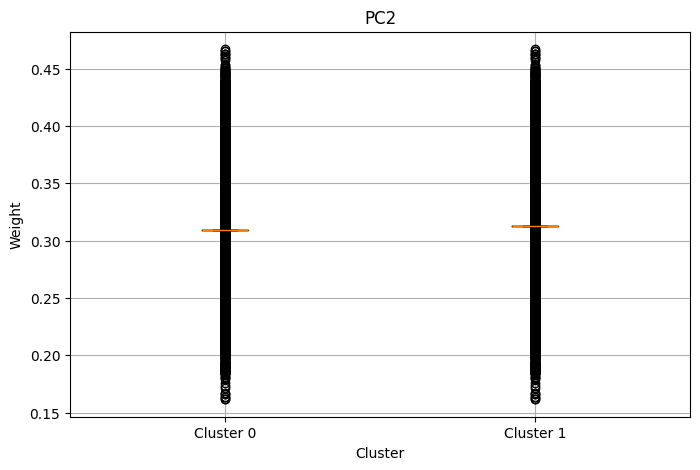

In [84]:
import matplotlib.pyplot as plt

features = df.columns.tolist()

n_features = w_output.shape[-1]

for col in range(n_features):
    plt.figure(figsize=(8, 5))
    data = [w_output[:, cluster, col] for cluster in range(w_output.shape[1])]
    plt.boxplot(data, labels=[f"Cluster {cluster}" for cluster in range(w_output.shape[1])])

    plt.title(f"{features[col]}")
    plt.xlabel("Cluster")
    plt.ylabel("Weight")
    plt.grid()
    plt.show()


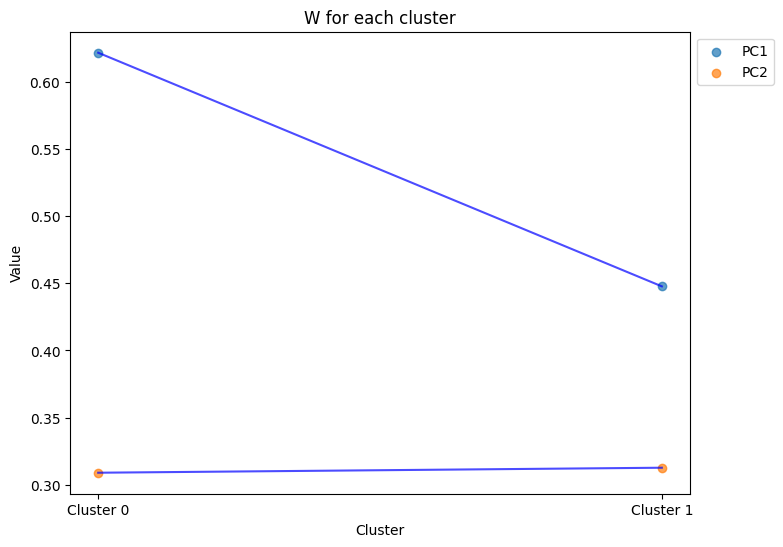

In [85]:
features = df.columns.tolist()

plt.figure(figsize=(8, 6))
for j, feature in enumerate(features):

    data = [w_manual[i][j] for i in range(len(w_manual))]
    
    plt.scatter(range(len(data)), data, alpha=0.7, label=feature)
    plt.plot(range(len(data)), data, color='b', alpha=0.7, label="_nolegend_")
plt.title(f"W for each cluster")
plt.xlabel("Cluster")
plt.ylabel("Value")
plt.xticks(range(len(w_manual)), [f"Cluster {i}" for i in range(len(w_manual))])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### Clustering Plot

C:\Users\hadik\AppData\Local\Temp\ipykernel_26012\2743300748.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_bmu_indices_pca))


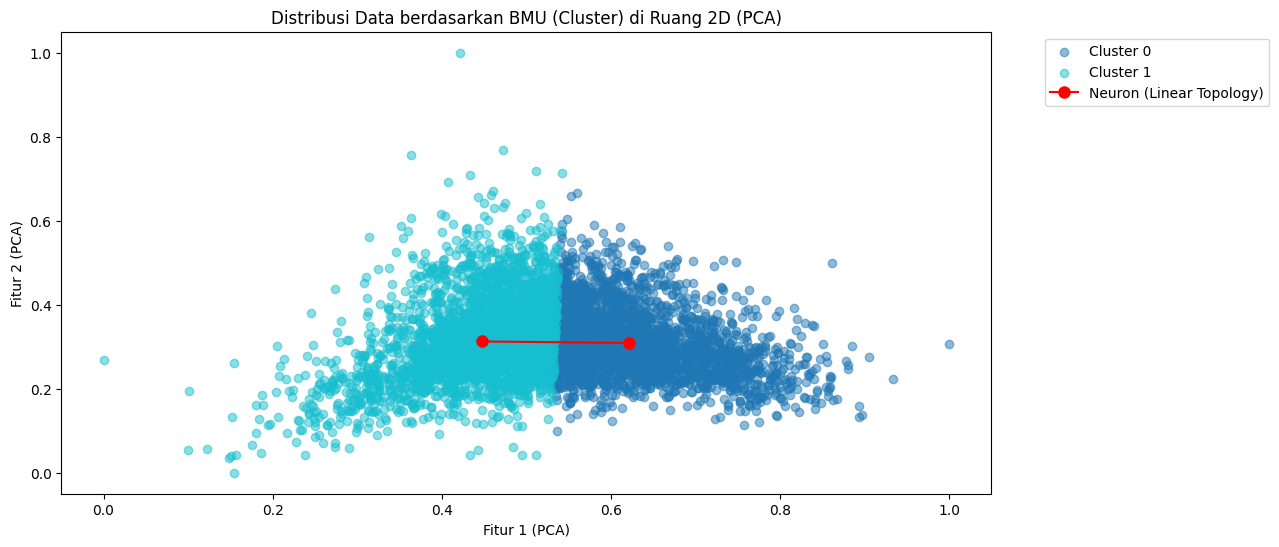

In [86]:

closest_neighbors = np.array(closest_neighbors_manual)

plt.figure(figsize=(12, 6))

unique_bmu_indices_pca = np.unique(closest_neighbors)
unique_bmu_indices_pca = unique_bmu_indices_pca.argsort()
colors = plt.cm.get_cmap("tab10", len(unique_bmu_indices_pca))

for i, bmu in enumerate(unique_bmu_indices_pca):
    cluster_data_pca = train[closest_neighbors == bmu]
    plt.scatter(cluster_data_pca[:, 0], cluster_data_pca[:, 1], label=f'Cluster {bmu}', color=colors(i), alpha=0.5)

plt.plot(w_manual[:, 0], w_manual[:, 1], 'r-o', label="Neuron (Linear Topology)", markersize=8)

plt.title("Distribusi Data berdasarkan BMU (Cluster) di Ruang 2D (PCA)")
plt.xlabel("Fitur 1 (PCA)")
plt.ylabel("Fitur 2 (PCA)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Hyperparameter Optuna

### Error Plot

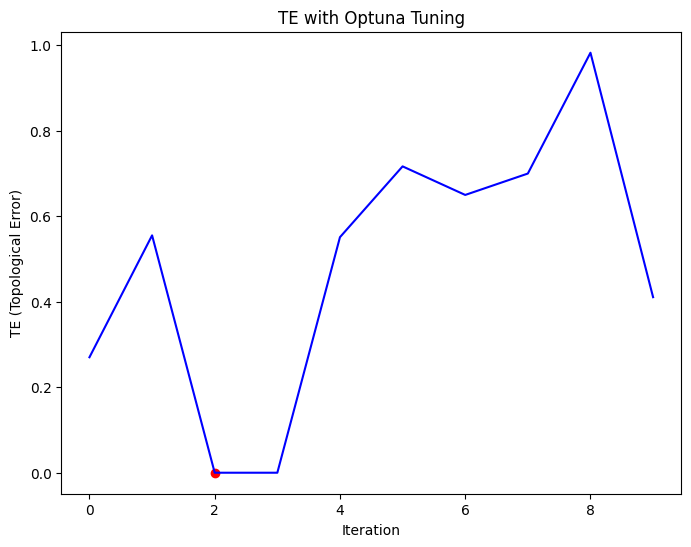

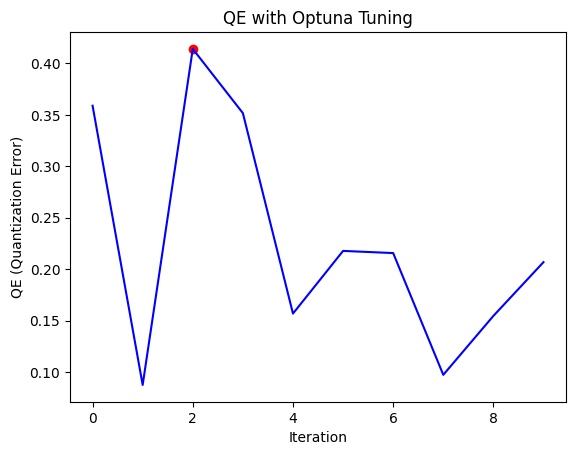

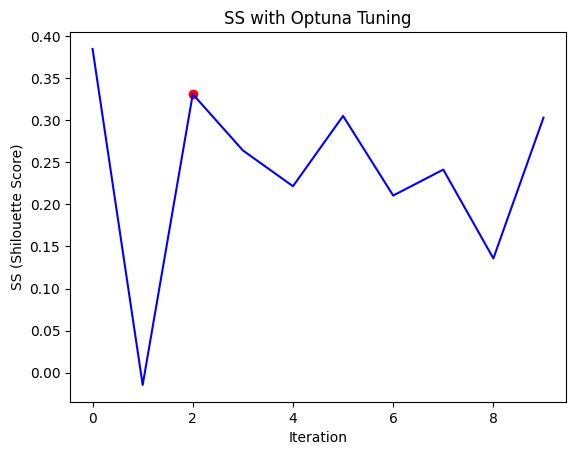

In [97]:
te_values, qe_values, ss_values = zip(*te_qe_ss_optuna_plot)
plt.figure(figsize=(8, 6))
plt.plot(te_values, c="blue", label="TE-QE points")
plt.scatter(study.best_trial.number,te_values[study.best_trial.number], color="red")
plt.xlabel("Iteration")
plt.ylabel("TE (Topological Error)")
plt.title("TE with Optuna Tuning")
plt.show()

plt.plot(qe_values, c="blue", label="TE-QE points")
plt.scatter(study.best_trial.number,qe_values[study.best_trial.number], color="red")
plt.xlabel("Iteration")
plt.ylabel("QE (Quantization Error)")
plt.title("QE with Optuna Tuning")
plt.show()

plt.plot(ss_values, c="blue", label="TE-ss points")
plt.scatter(study.best_trial.number,ss_values[study.best_trial.number], color="red")
plt.xlabel("Iteration")
plt.ylabel("SS (Shilouette Score)")
plt.title("SS with Optuna Tuning")
plt.show()

### Weight Plot

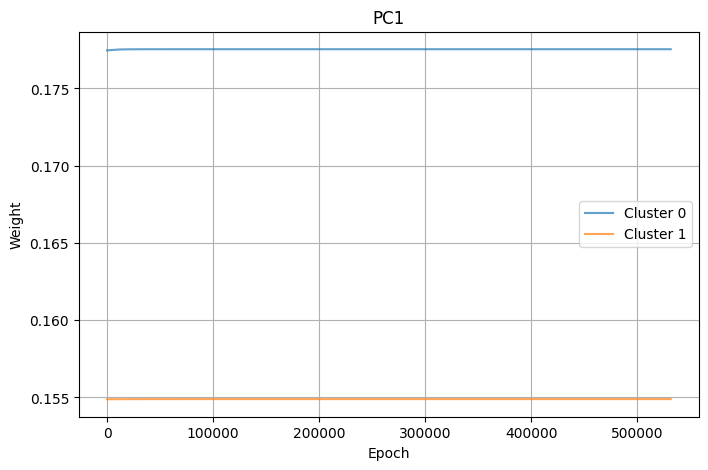

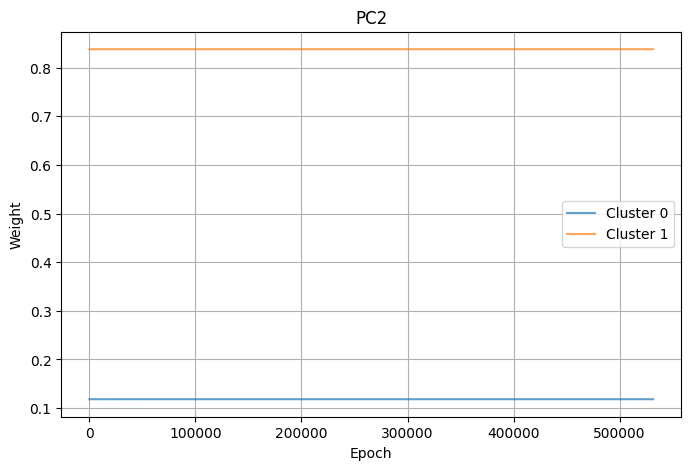

In [88]:
feature = df.columns.tolist()
w_output = np.array(w_output_optuna)

n_features = w_output.shape[-1]
for col in range(n_features):
    plt.figure(figsize=(8, 5))
    for cluster in range(w_output.shape[1]):
        plt.plot(range(w_output.shape[0]), w_output[:, cluster, col], label=f"Cluster {cluster}", alpha=0.7)
    # Use feature[col] for the title
    plt.title(f"{feature[col]}")
    plt.xlabel("Epoch")
    plt.ylabel("Weight")
    plt.legend()
    plt.grid()
    plt.show()

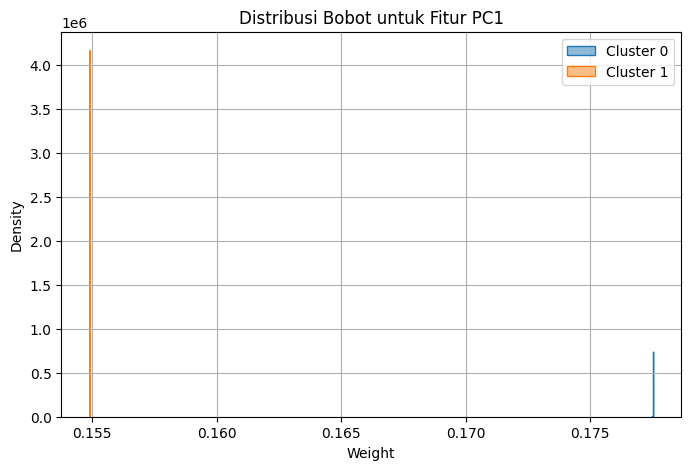

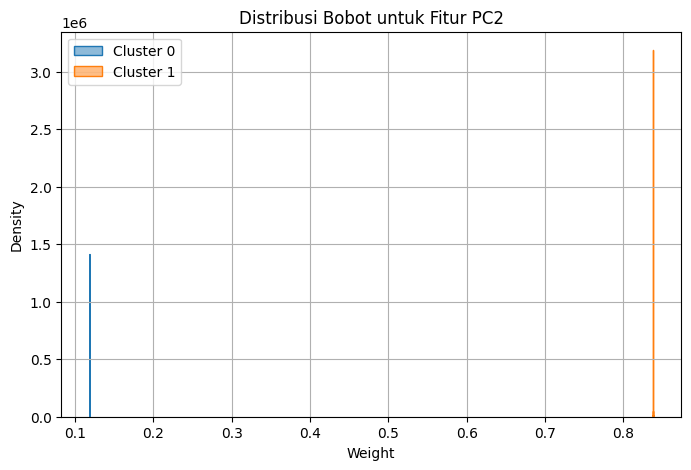

In [89]:
import matplotlib.pyplot as plt

features = df.columns.tolist()

n_features = w_output.shape[-1]

for col in range(n_features):
    plt.figure(figsize=(8, 5))
    for cluster in range(w_output.shape[1]):
        weights = w_output[:, cluster, col]
        sns.kdeplot(weights, label=f"Cluster {cluster}", fill=True, alpha=0.5)

    plt.title(f"Distribusi Bobot untuk Fitur {features[col]}")
    plt.xlabel("Weight")
    plt.ylabel("Density")
    plt.legend()
    plt.grid()
    plt.show()


C:\Users\hadik\AppData\Local\Temp\ipykernel_26012\3753402374.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[f"Cluster {cluster}" for cluster in range(w_output.shape[1])])


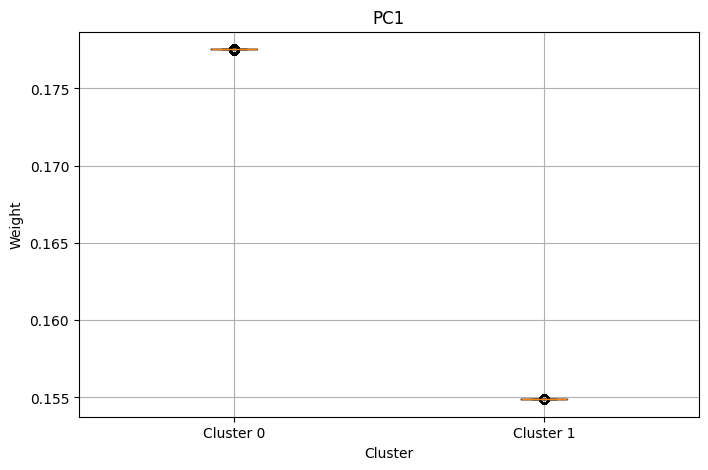

C:\Users\hadik\AppData\Local\Temp\ipykernel_26012\3753402374.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[f"Cluster {cluster}" for cluster in range(w_output.shape[1])])


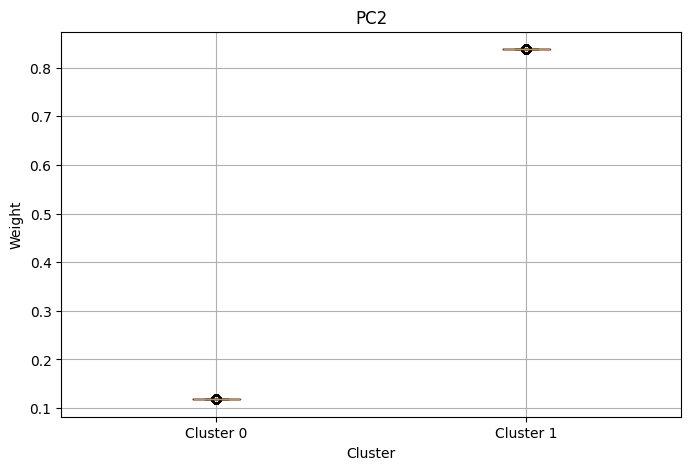

In [90]:
import matplotlib.pyplot as plt

features = df.columns.tolist()

n_features = w_output.shape[-1]

for col in range(n_features):
    plt.figure(figsize=(8, 5))
    data = [w_output[:, cluster, col] for cluster in range(w_output.shape[1])]
    plt.boxplot(data, labels=[f"Cluster {cluster}" for cluster in range(w_output.shape[1])])

    plt.title(f"{features[col]}")
    plt.xlabel("Cluster")
    plt.ylabel("Weight")
    plt.grid()
    plt.show()


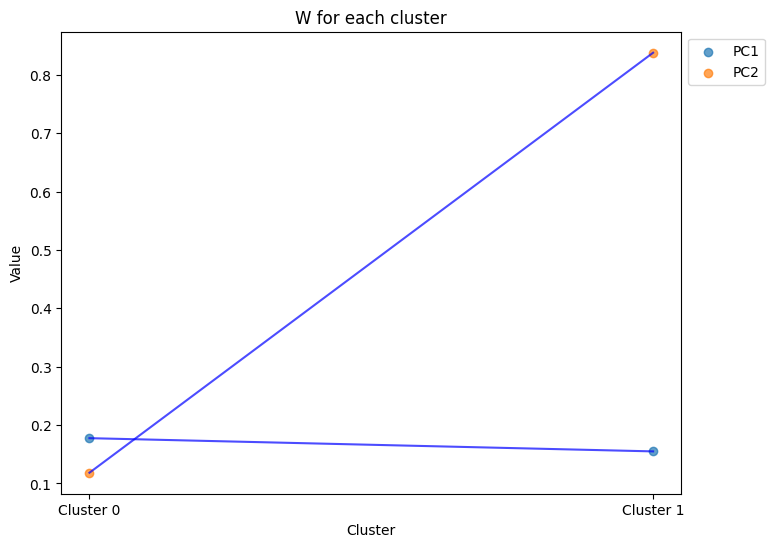

In [91]:
features = df.columns.tolist()

plt.figure(figsize=(8, 6))
for j, feature in enumerate(features):

    data = [w_optuna[i][j] for i in range(len(w_optuna))]
    
    plt.scatter(range(len(data)), data, alpha=0.7, label=feature)
    plt.plot(range(len(data)), data, color='b', alpha=0.7, label="_nolegend_")
plt.title(f"W for each cluster")
plt.xlabel("Cluster")
plt.ylabel("Value")
plt.xticks(range(len(w_optuna)), [f"Cluster {i}" for i in range(len(w_optuna))])  # Menampilkan cluster 0, 1, 2, 3 pada sumbu x
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### Clustering Plot

C:\Users\hadik\AppData\Local\Temp\ipykernel_26012\1695232180.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_bmu_indices_pca))


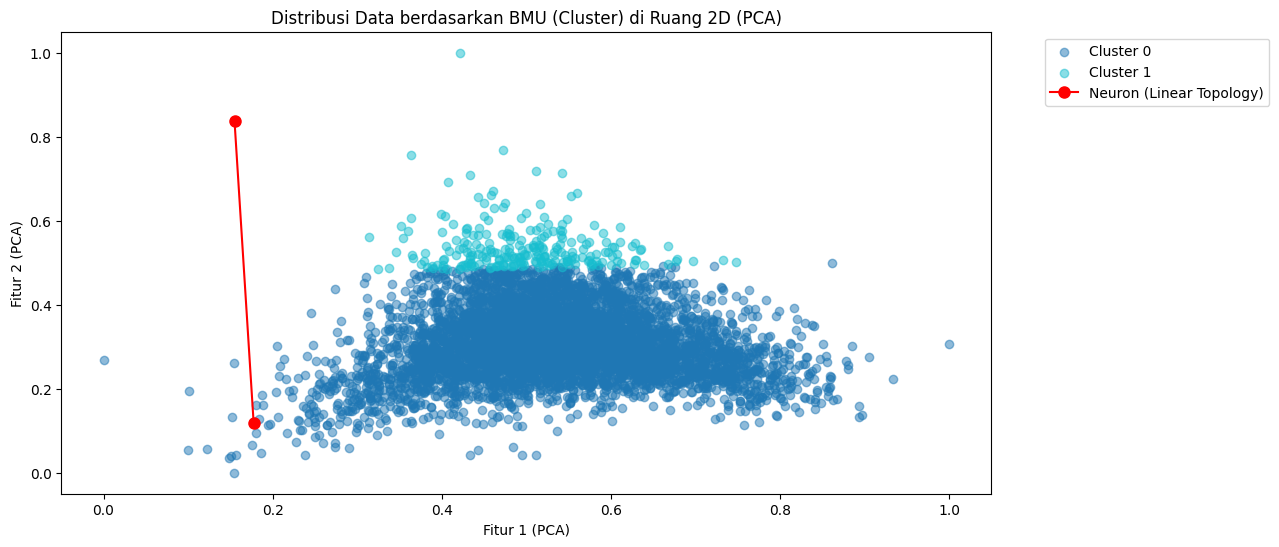

In [92]:

closest_neighbors = np.array(closest_neighbors_optuna)

plt.figure(figsize=(12, 6))

unique_bmu_indices_pca = np.unique(closest_neighbors)
unique_bmu_indices_pca = unique_bmu_indices_pca.argsort()
colors = plt.cm.get_cmap("tab10", len(unique_bmu_indices_pca))

for i, bmu in enumerate(unique_bmu_indices_pca):
    cluster_data_pca = train[closest_neighbors == bmu]
    plt.scatter(cluster_data_pca[:, 0], cluster_data_pca[:, 1], label=f'Cluster {bmu}', color=colors(i), alpha=0.5)

plt.plot(w_optuna[:, 0], w_optuna[:, 1], 'r-o', label="Neuron (Linear Topology)", markersize=8)

plt.title("Distribusi Data berdasarkan BMU (Cluster) di Ruang 2D (PCA)")
plt.xlabel("Fitur 1 (PCA)")
plt.ylabel("Fitur 2 (PCA)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()